# Multiple Linear Regression

We begin by importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib.lines as mlines
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from stargazer.stargazer import Stargazer
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor

Using TensorFlow backend.


Next we read in the dataset and save it under data.

In [2]:
data = pd.read_csv('data_preprocessed.csv')

## Replication MLR

In [3]:
regressor = sm.OLS(endog=data['lnpercapitaconsumption'], exog=sm.add_constant(data[data.columns[1:65]])).fit()

In [4]:
Stargazer([regressor])

In [5]:
regressor.summary().tables[0]

Dep. Variable:,lnpercapitaconsumption,R-squared:,0.656
Model:,OLS,Adj. R-squared:,0.655
Method:,Least Squares,F-statistic:,683.9
Date:,"Tue, 17 Nov 2020",Prob (F-statistic):,0.00
Time:,16:10:13,Log-Likelihood:,-13433.
No. Observations:,22674,AIC:,2.699e+04
Df Residuals:,22610,BIC:,2.751e+04
Df Model:,63,,
Covariance Type:,nonrobust,,


In [6]:
regressor.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,5.3617,0.061,88.165,0.000,5.243,5.481
d_fuel_wood,0.0643,0.011,6.041,0.000,0.043,0.085
d_fuel_coal,0.2524,0.021,11.852,0.000,0.211,0.294
d_fuel_kerosene,0.2586,0.046,5.581,0.000,0.168,0.349
d_fuel_gas,0.3121,0.013,24.213,0.000,0.287,0.337
d_fuel_electric,0.6475,0.037,17.689,0.000,0.576,0.719
d_fuel_none,0.4721,0.020,23.059,0.000,0.432,0.512
d_water_river,-0.0862,0.017,-5.222,0.000,-0.119,-0.054
d_water_well,-0.0413,0.021,-1.993,0.046,-0.082,-0.001
d_water_truck,0.0996,0.027,3.691,0.000,0.047,0.152


In [7]:
regressor.mse_resid

0.19201190211538935

## A Second Option

We set per capita consumption as the dependent variable and the rest of the columns as the explanatory variables.

In [8]:
X = data.drop(['lnpercapitaconsumption'],axis=1)
y = data['lnpercapitaconsumption']

We split the dataset into training and test sets.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

We create our regression model and run it.

In [10]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We get the coefficients

In [11]:
regressor.coef_

array([ 6.17761720e-02,  2.45726753e-01,  2.79754939e-01,  3.07637042e-01,
        7.16502666e-01,  4.57695221e-01, -9.10591442e-02, -3.82867551e-02,
        8.75334343e-02, -2.56511672e-02,  5.99556930e-02, -1.76350498e-02,
       -1.27918070e-01, -9.09211314e-02, -1.05434734e-01, -1.13933258e-01,
       -7.02563182e-02, -5.39871876e-02,  5.14058675e-02, -1.58856459e-01,
        2.23059366e-02, -1.71698420e-01, -1.19260235e-01, -2.34023460e-02,
       -3.27651472e-02, -1.19861943e-01,  6.81726740e-02,  1.31128842e-02,
       -6.95185408e-02,  3.12035912e-02, -2.34265705e-02, -6.01190409e-02,
        7.27834981e-02,  5.66745188e-02,  2.30929403e-01,  2.23840741e-01,
        3.46484591e-01,  7.02793499e-02,  4.92204165e-02, -2.01016882e+10,
       -2.01016882e+10, -2.01016882e+10, -2.01016882e+10, -2.01016882e+10,
       -2.01016882e+10, -2.01016882e+10, -3.96213846e-01, -2.38901271e-01,
       -1.61044413e-01, -1.10339569e-01, -7.01608376e-02,  2.66618730e-02,
       -6.55634941e-02, -

We get our predictions.

In [12]:
y_pred = regressor.predict(X_test)

We plot our predictions against actual values.

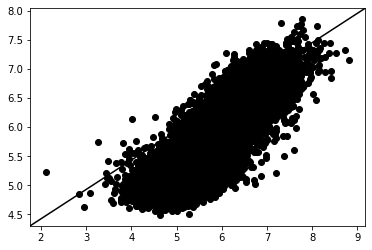

In [13]:
x, y = y_test,y_pred
fig, ax = plt.subplots()
ax.scatter(x, y, c='black')
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

We calculate the mean squared error.

In [14]:
sklearn.metrics.mean_squared_error(y_test, y_pred)

0.1909971055243584